In [80]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## Summary of Important information for Thailand from https://data.worldbank.org/country/thailand 
* Reliability: World Bank is quite well known to be reliable, but metric such as GHG emission is not known how it is truly collected
* There are a few missing data on certain older years, likely occur by the fact that the metric is just not tracked in that year yet

Thailand Info

In [81]:
df = pd.read_csv('../data/Thailand/WorldBankThailand.csv', skiprows=4)
df.head(5)
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

## Tidying and Cleaning the Data 

In [82]:
df_tidy = df.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                  var_name = 'Year',
                  value_name = 'Value')
df_tidy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Thailand,THA,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,1960,NaN
1,Thailand,THA,"Internally displaced persons, new displacement...",VC.IDP.NWDS,1960,NaN
2,Thailand,THA,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,1960,NaN
3,Thailand,THA,Voice and Accountability: Estimate,VA.EST,1960,NaN
4,Thailand,THA,High-technology exports (current US$),TX.VAL.TECH.CD,1960,NaN


In [83]:
# Remove NaN value as it is irrelevent data in this context
print(df_tidy.shape)
df_tidy = df_tidy.dropna()
df_tidy.shape

(96980, 6)


(44922, 6)

In [84]:
# now use pivot to get rid of the value column
df.drop('Indicator Code', axis='columns', inplace=True)
df_tidy_pivot = df_tidy.pivot(index=['Country Name', 'Country Code', 'Year'], columns='Indicator Name', values='Value')
df_tidy_pivot = df_tidy_pivot.reset_index()
df_tidy_pivot.columns.name = None
df_tidy_pivot.head()

,Country Name,Country Code,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,"Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women Business and the Law Index Score (scale 1-100),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Thailand,THA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.351830,NaN,NaN,NaN,NaN,NaN
1,Thailand,THA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.933560,NaN,NaN,NaN,NaN,NaN
2,Thailand,THA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.252918,NaN,NaN,NaN,NaN,NaN
3,Thailand,THA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.847352,NaN,NaN,NaN,NaN,NaN
4,Thailand,THA,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.591713,NaN,NaN,NaN,NaN,NaN


## Data Analysis

### Interesting Indicators to look at for SDG 13 for this dataset
Total greenhouse gas emissions (kt of CO2 equivalent): This is directly related to climate change and can help measure the impact of human activities on climate change. This is very useful to look at when looking at just Thailand.

CO2 emissions (metric tons per capita): A key measure of climate action, as reducing CO2 emissions is central to addressing global warming. This metric is less accurate than total GHG emission as it only looks at CO2, but can allow better comparison with other country as it is a metric per pouplation. 

From this I think it is useful for me to find the Total Greenhouse Gas Emissions per capital by simply dividing the Total Greenhouse Gas Emissions by the total population of Thailand in that year. Total GHG Emissions is Tier 1 as an indicator for a target of SDG 13.

Methane emissions (kt of CO2 equivalent): Methane is a potent greenhouse gas, and monitoring its emissions can offer insights into climate action, particularly in sectors like agriculture and waste management.

### Interesting Indicators to look at for SDG 15
Forest area (% of land area): Deforestation is a major driver of biodiversity loss and land degradation, and it impacts both climate change and life on land.

Terrestrial protected areas (% of total land area): This metric shows the extent of land dedicated to conservation, which is important for biodiversity and ecosystem resilience.

Forest rents (% of GDP): This indicates the economic value of forest resources, highlighting the link between forest ecosystems and national economies.

In [85]:
# obtain population data, so that I can convert Total GHG emissions as per capita term
df_population = pd.read_csv('../data/TidyPopulationWorldBank.csv')
df_population.head()

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54608.0
1,Africa Eastern and Southern,AFE,1960,130692579.0
2,Afghanistan,AFG,1960,8622466.0
3,Africa Western and Central,AFW,1960,97256290.0
4,Angola,AGO,1960,5357195.0


### Total GHG emission per Capita
Tier 1 Indicator for SDG Target 13.2

In [86]:
df_population['Year'] = df_population['Year'].astype(int)
df_tidy_pivot['Year'] = df_tidy_pivot['Year'].astype(int) #need to be same type
# now merge the population to df_tidy_pivot for Thailand
df_merged = pd.merge(df_population, df_tidy_pivot, how='right', on=['Country Name', 'Country Code', 'Year'])
df_merged.head()

,Country Name,Country Code,Year,Population,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)",...,"Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Wanted fertility rate (births per woman),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100),Women Business and the Law Index Score (scale 1-100),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,Thailand,THA,1960,26596584.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.351830,NaN,NaN,NaN,NaN,NaN
1,Thailand,THA,1961,27399963.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.933560,NaN,NaN,NaN,NaN,NaN
2,Thailand,THA,1962,28242174.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.252918,NaN,NaN,NaN,NaN,NaN
3,Thailand,THA,1963,29114124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,20.847352,NaN,NaN,NaN,NaN,NaN
4,Thailand,THA,1964,30013573.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.591713,NaN,NaN,NaN,NaN,NaN


In [87]:
# make a new column for Total GHG emissions per capita (kt of CO2 equivalent per capita)
df_merged['Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)'] = df_merged['Total greenhouse gas emissions (kt of CO2 equivalent)'] * 1000/df_merged['Population']
# df_merged[['Year', 'Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)']].head(50)
df_merged.to_csv('../data/Thailand/TidyThailandWorldBank.csv', index=False)

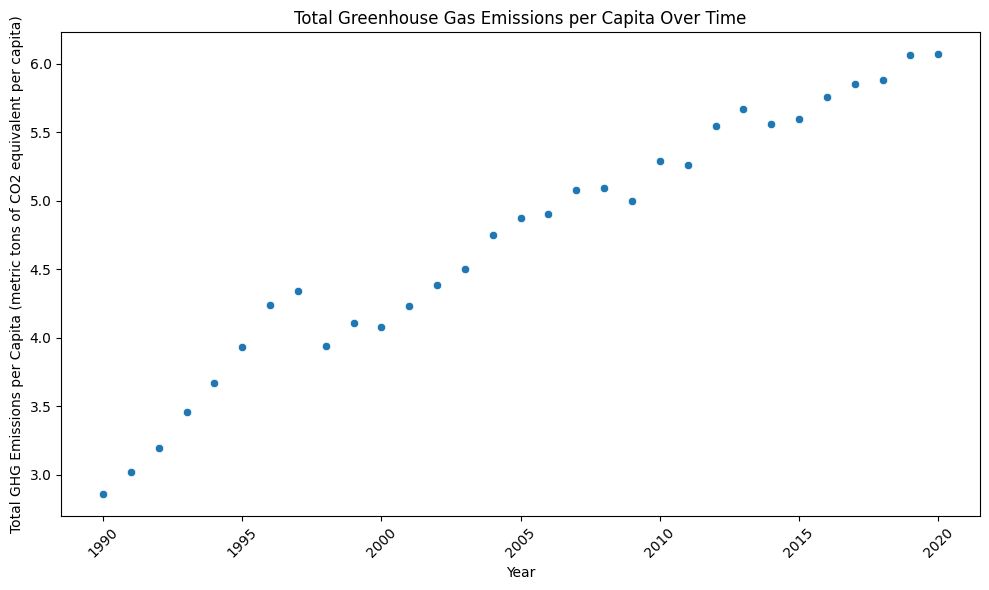

In [88]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('Total Greenhouse Gas Emissions per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)')
plt.tight_layout()
plt.show()

### Forest Area (% of Land Area)
This is another important indicator for SDG 15. It is a Tier 1 Indicator for SDG Target 15.1

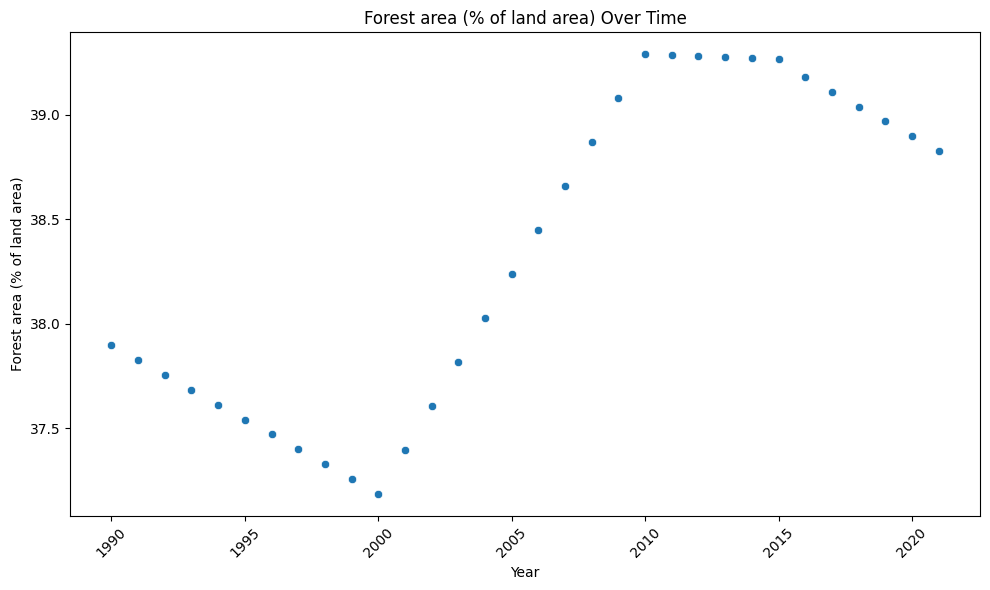

In [89]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Year', y='Forest area (% of land area)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('Forest area (% of land area) Over Time')
plt.xlabel('Year')
plt.ylabel('Forest area (% of land area)')
plt.tight_layout()
plt.show()

The straight lines are very suspicious, this data might have only be taken at 4 place and then it is just interpolated

### Add Column from UNData

In [90]:
# adding the 15.2.1Tidy.csv column, so we obtain the Forest Area certified under verified certification scheme (thousands of hectares) variable
df_1521 = pd.read_csv('../data/Thailand/UNData/15.2.1Tidy.csv')
df_1521.columns[1]

'Forest area certified under an independently verified certification scheme (thousands of hectares)'

In [91]:
# perform left join
df_merged = df_merged.merge(df_1521, how = 'left', on = 'Year')
df_merged[['Year', 'Forest area certified under an independently verified certification scheme (thousands of hectares)','Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)' ]].tail(20)


,Year,Forest area certified under an independently verified certification scheme (thousands of hectares),Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)
44,2004,NaN,4.746443
45,2005,2.94,4.872529
46,2006,NaN,4.905054
47,2007,NaN,5.076486
48,2008,NaN,5.096261
49,2009,NaN,4.996016
50,2010,7.64,5.290978
51,2011,NaN,5.257982
52,2012,NaN,5.547705
53,2013,NaN,5.666870


In [92]:
#perform linear interpolation and check values again
# Set the Year column as the index
df_merged.set_index('Year', inplace=True)
# Interpolate missing values
df_merged['Forest area certified under an independently verified certification scheme (thousands of hectares)'] = df_merged['Forest area certified under an independently verified certification scheme (thousands of hectares)'].interpolate(method='linear')
# Reset index if necessary
df_merged.reset_index(inplace=True)
df_merged[['Year', 'Forest area certified under an independently verified certification scheme (thousands of hectares)','Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)' ]].tail(20)

,Year,Forest area certified under an independently verified certification scheme (thousands of hectares),Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)
44,2004,2.352,4.746443
45,2005,2.940,4.872529
46,2006,3.880,4.905054
47,2007,4.820,5.076486
48,2008,5.760,5.096261
49,2009,6.700,4.996016
50,2010,7.640,5.290978
51,2011,14.960,5.257982
52,2012,22.280,5.547705
53,2013,29.600,5.666870


In [93]:
# make a function for the above steps
def AddUNColumn(country: str, indicator_nums:str, df_merged):
    df = pd.read_csv(f'../data/{country}/UNData/{indicator_nums}Tidy.csv')
    col_name = df.columns[1]
    df_merged = df_merged.merge(df, how = 'left', on = 'Year')
    # Set the Year column as the index
    df_merged.set_index('Year', inplace=True)
    # Interpolate missing values
    df_merged[col_name] = df_merged[col_name].interpolate(method='linear')
    # Reset index if necessary
    df_merged.reset_index(inplace=True)
    return df_merged, col_name

In [94]:
df_merged, col_name = AddUNColumn('Thailand', '15.6.1', df_merged)
df_merged[['Year', col_name,'Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)' ]].tail(20)

,Year,Total reported number of Standard Material Transfer Agreements (SMTAs) transferring plant genetic resources for food and agriculture to the country (number),Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)
44,2004,NaN,4.746443
45,2005,NaN,4.872529
46,2006,NaN,4.905054
47,2007,NaN,5.076486
48,2008,NaN,5.096261
49,2009,NaN,4.996016
50,2010,NaN,5.290978
51,2011,NaN,5.257982
52,2012,169.0,5.547705
53,2013,185.0,5.666870


## Sample Analysis of relationship between SDG 13 and 15

### Using Pearson Correlation

In [95]:
correlation_matrix = df_merged[['Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)', 'Forest area (% of land area)']].corr()
correlation_matrix

,Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita),Forest area (% of land area)
Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita),1.000000,0.817533
Forest area (% of land area),0.817533,1.000000


A Pearson Correlation value of 0.818 indicates a strong positive correlation between Total GHG Emission per Capita and Forest area. At first glance, this seems unexpected as more forest area would have indicated more trees, leading to less GHG emissions. However, this value alone does not account for the fact that having higher forest area might increase drive for forest exploitation (eg. deforestation) which could lead to further CO2 emissions. Also, having only one variable as indicator for each SDG is not enough as many variables contribute to progress towards each SDG. For example, forest area does not fully tell the full story of whether forest conservation or reforestation effort is actually taking place. Pearson Correlation assumes relationship between two variables is linear and also the variables are normally distributed

### Using Linear Regression

In [96]:
df_remove_nan = df_merged.dropna(subset=['Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)', 'Forest area (% of land area)'])
from sklearn.linear_model import LinearRegression

X = df_remove_nan[['Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)']]  # independent variable (SDG 13)
y = df_remove_nan['Forest area (% of land area)']  # dependent variable (SDG 15)

model = LinearRegression().fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Display the results
print(f"Linear Regression Model: y = {slope} * X + {intercept}")

#not sure how useful this is, it does indicate positive correlation, but if I want to test how good the linear regression model is I will have to split to train/test set


Linear Regression Model: y = 0.6877360658266894 * X + 35.07835034399538


### Using Time Series Analysis

In [97]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_remove_nan[['Total GHG Emissions per Capita (metric tons of CO2 equivalent per capita)', 'Forest area (% of land area)']], maxlag=3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9577  , p=0.1731  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=2.1752  , p=0.1403  , df=1
likelihood ratio test: chi2=2.0999  , p=0.1473  , df=1
parameter F test:         F=1.9577  , p=0.1731  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2986  , p=0.2914  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=3.1382  , p=0.2082  , df=2
likelihood ratio test: chi2=2.9797  , p=0.2254  , df=2
parameter F test:         F=1.2986  , p=0.2914  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0655  , p=0.3849  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=4.2621  , p=0.2345  , df=3
likelihood ratio test: chi2=3.9673  , p=0.2650  , df=3
parameter F test:         F=1.0655  , p=0.3849  , df_denom=21, df_num=3


{1: ({'ssr_ftest': (1.9576681709984176, 0.17314672547752086, 27.0, 1),
   'ssr_chi2test': (2.1751868566649084, 0.14025248017326492, 1),
   'lrtest': (2.0999453794237652, 0.14730440068810738, 1),
   'params_ftest': (1.957668170998425, 0.17314672547751972, 27.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.2985651511837664, 0.2914187755704312, 24.0, 2),
   'ssr_chi2test': (3.1381991153607687, 0.2082325994100668, 2),
   'lrtest': (2.979735391256881, 0.22540247529959542, 2),
   'params_ftest': (1.2985651511837784, 0.29141877557042817, 24.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0655171128038443, 0.3848791366741282, 21.0, 3),
   'ssr_chi2test': (4.262068451215376, 0.23452065961210133, 3),
   'lrtest': (3.967255000995081, 0.26502177648496944, 3),
   'params_ftest': (1.065517112803986, 0.38487913667407103, 21.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

p-value are all above 0.05, which means that the null hypothesis is not rejected, indicating that there is no statistical evidence that change in total GHG emission per capita affects forest area. If these two indicators are the only indicator for SDG 13 and 15, then we would be able to conclude that they are not related. However, two indicators is not enough, we need to find more variables that influence these value. Also, Granger causality assumes linear relationship, it is probably much more complex than that.

### Other Methods we can explore:
* Panel Data Analysis
* Principle Component Analysis
* Structure Equation Modelling (SEM)
* Casual Inference Methods

* AND YES FIND MORE INDICATORS 

## Archived (might not be important for now)

### GHG Emissions in Thailand
This metric is total GHG emission per killotones of CO2 equivalent, meaning emissions of other GHG is converted to the amount of greenhouse effect it would give if it was CO2

In [98]:
df_ghg = df_tidy_pivot[['Year', 'Total greenhouse gas emissions (kt of CO2 equivalent)']]
df_ghg.head(10)

,Year,Total greenhouse gas emissions (kt of CO2 equivalent)
0,1960,NaN
1,1961,NaN
2,1962,NaN
3,1963,NaN
4,1964,NaN
5,1965,NaN
6,1966,NaN
7,1967,NaN
8,1968,NaN
9,1969,NaN


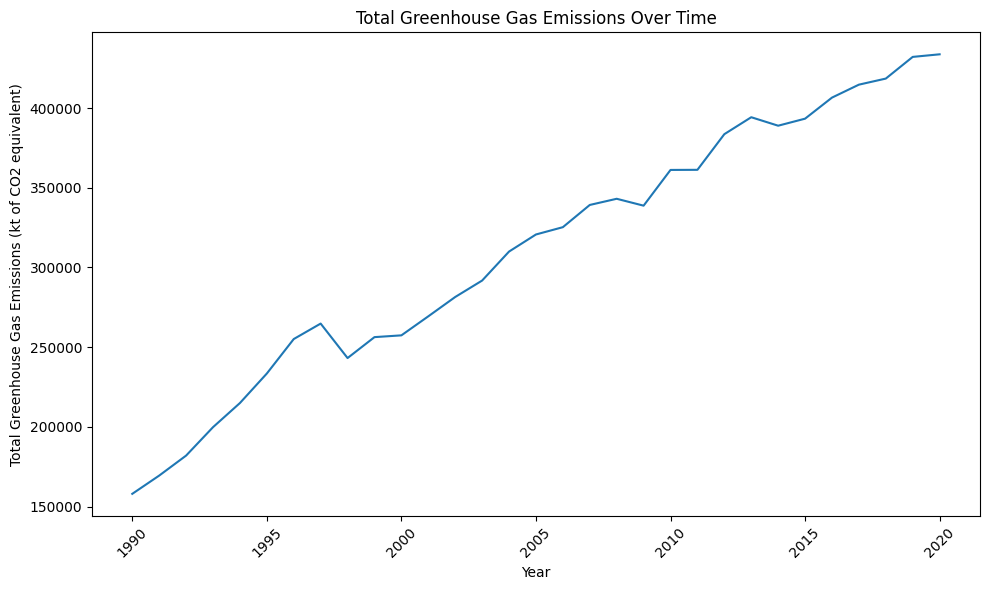

In [99]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tidy_pivot, x='Year', y='Total greenhouse gas emissions (kt of CO2 equivalent)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('Total Greenhouse Gas Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Greenhouse Gas Emissions (kt of CO2 equivalent)')
plt.tight_layout()
plt.show()

### PM 2.5 Trend in Thailand

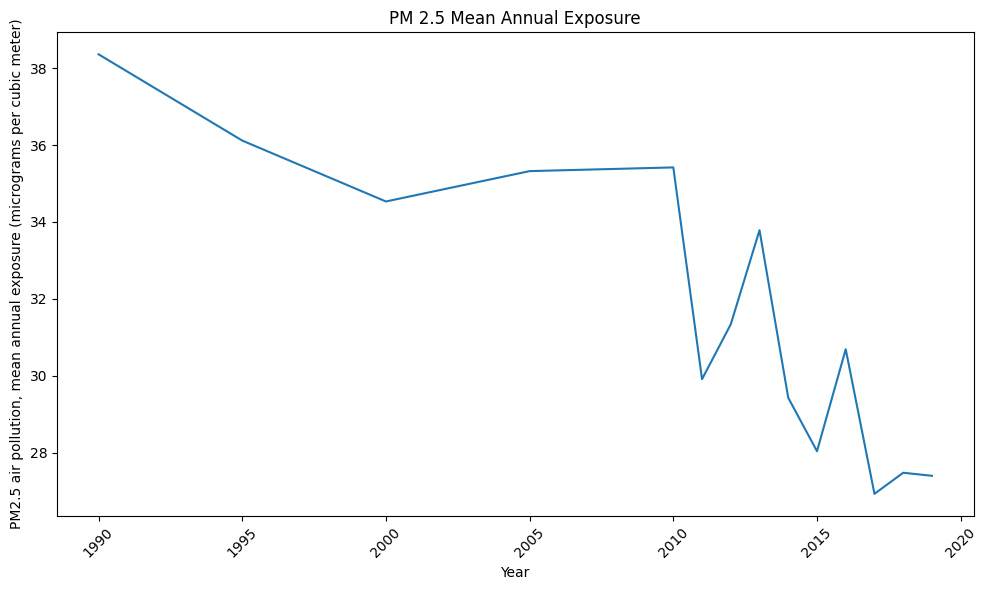

In [100]:
# Visualise this data
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tidy_pivot, x='Year', y='PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')
# Rotate x-axis tick labels for readability
plt.xticks(rotation=45)

plt.title('PM 2.5 Mean Annual Exposure')
plt.xlabel('Year')
plt.ylabel('PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')
plt.tight_layout()
plt.show()

Although this seems to show reduction of PM 2.5 levels in Thailand, it is important to recognize this is international data, and the pollution peaks are very bad in specific cities such as Bangkok or Chiang Mai. 